In [1]:
# get the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Ireland_Housing.csv')

In [3]:
df

,Statistic,Year,Dwelling Status,Stamp Duty Event,RPPI Region,Type of Buyer,UNIT,VALUE
0,Volume of Sales,2010,All Dwelling Statuses,Filings,All,All Buyer Types,Number,19302
1,Volume of Sales,2010,All Dwelling Statuses,Filings,All,Household Buyer - First-Time Buyer Owner-Occupier,Number,10434
2,Volume of Sales,2010,All Dwelling Statuses,Filings,All,Household Buyer - Former Owner-Occupier,Number,6237
3,Volume of Sales,2010,All Dwelling Statuses,Filings,All,Household Buyer - Non-Occupier,Number,2631
4,Volume of Sales,2010,All Dwelling Statuses,Filings,Border Excluding Louth,All Buyer Types,Number,1465
...,...,...,...,...,...,...,...,...
12091,Volume of Sales,2021,Existing,Executions,Cork County,Household Buyer - Non-Occupier,Number,521
12092,Volume of Sales,2021,Existing,Executions,Kerry,All Buyer Types,Number,1162
12093,Volume of Sales,2021,Existing,Executions,Kerry,Household Buyer - First-Time Buyer Owner-Occupier,Number,217
12094,Volume of Sales,2021,Existing,Executions,Kerry,Household Buyer - Former Owner-Occupier,Number,628


In [4]:
columns=df.columns
df.rename(columns = {'RPPI Region':'Region'}, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12096 entries, 0 to 12095
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Statistic         12096 non-null  object
 1   Year              12096 non-null  int64 
 2   Dwelling Status   12096 non-null  object
 3   Stamp Duty Event  12096 non-null  object
 4   Region            12096 non-null  object
 5   Type of Buyer     12096 non-null  object
 6   UNIT              12096 non-null  object
 7   VALUE             12096 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 756.1+ KB


In [6]:
# Descriptive statistics before removing 'All' rows
df.describe()

,Year,VALUE
count,12096.000000,12096.000000
mean,2015.500000,816.877976
std,3.452195,2632.004327
min,2010.000000,0.000000
25%,2012.750000,73.000000
50%,2015.500000,215.000000
75%,2018.250000,625.000000
max,2021.000000,46419.000000


In [7]:
df = df[~df['Region'].isin(['All'])]
df = df[~df['Type of Buyer'].isin(['All Buyer Types'])]
df = df[~df['Dwelling Status'].isin(['All Dwelling Statuses'])]

In [8]:
# Descriptive statistics after removing 'All' rows
df.describe()

,Year,VALUE
count,5904.000000,5904.000000
mean,2015.500000,278.933943
std,3.452345,523.761126
min,2010.000000,0.000000
25%,2012.750000,31.000000
50%,2015.500000,106.000000
75%,2018.250000,282.000000
max,2021.000000,6399.000000


In [9]:
avg = df.mean()
avg

C:\Users\MASTER~1\AppData\Local\Temp/ipykernel_6724/1160149678.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = df.mean()


Year     2015.500000
VALUE     278.933943
dtype: float64

In [10]:
med = df.median()
med

C:\Users\MASTER~1\AppData\Local\Temp/ipykernel_6724/3897186036.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med = df.median()


Year     2015.5
VALUE     106.0
dtype: float64

In [11]:
standard = df.std()
standard

C:\Users\MASTER~1\AppData\Local\Temp/ipykernel_6724/1118077598.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  standard = df.std()


Year       3.452345
VALUE    523.761126
dtype: float64

In [12]:
df

,Statistic,Year,Dwelling Status,Stamp Duty Event,Region,Type of Buyer,UNIT,VALUE
341,Volume of Sales,2010,New,Filings,Border Excluding Louth,Household Buyer - First-Time Buyer Owner-Occupier,Number,313
342,Volume of Sales,2010,New,Filings,Border Excluding Louth,Household Buyer - Former Owner-Occupier,Number,218
343,Volume of Sales,2010,New,Filings,Border Excluding Louth,Household Buyer - Non-Occupier,Number,153
345,Volume of Sales,2010,New,Filings,Cavan,Household Buyer - First-Time Buyer Owner-Occupier,Number,83
346,Volume of Sales,2010,New,Filings,Cavan,Household Buyer - Former Owner-Occupier,Number,77
...,...,...,...,...,...,...,...,...
12090,Volume of Sales,2021,Existing,Executions,Cork County,Household Buyer - Former Owner-Occupier,Number,1797
12091,Volume of Sales,2021,Existing,Executions,Cork County,Household Buyer - Non-Occupier,Number,521
12093,Volume of Sales,2021,Existing,Executions,Kerry,Household Buyer - First-Time Buyer Owner-Occupier,Number,217
12094,Volume of Sales,2021,Existing,Executions,Kerry,Household Buyer - Former Owner-Occupier,Number,628


In [13]:
df = df.drop('Statistic', 1)
df = df.drop('UNIT', 1)

C:\Users\MASTER~1\AppData\Local\Temp/ipykernel_6724/3379983019.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Statistic', 1)
C:\Users\MASTER~1\AppData\Local\Temp/ipykernel_6724/3379983019.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('UNIT', 1)


In [14]:
df.head(10)

,Year,Dwelling Status,Stamp Duty Event,Region,Type of Buyer,VALUE
341,2010,New,Filings,Border Excluding Louth,Household Buyer - First-Time Buyer Owner-Occupier,313
342,2010,New,Filings,Border Excluding Louth,Household Buyer - Former Owner-Occupier,218
343,2010,New,Filings,Border Excluding Louth,Household Buyer - Non-Occupier,153
345,2010,New,Filings,Cavan,Household Buyer - First-Time Buyer Owner-Occupier,83
346,2010,New,Filings,Cavan,Household Buyer - Former Owner-Occupier,77
347,2010,New,Filings,Cavan,Household Buyer - Non-Occupier,41
349,2010,New,Filings,Donegal,Household Buyer - First-Time Buyer Owner-Occupier,87
350,2010,New,Filings,Donegal,Household Buyer - Former Owner-Occupier,59
351,2010,New,Filings,Donegal,Household Buyer - Non-Occupier,55
353,2010,New,Filings,Leitrim,Household Buyer - First-Time Buyer Owner-Occupier,38


In [15]:
df.isnull().any().sum()

0

In [16]:
df['Dwelling Status'] = df['Dwelling Status'].map({'Existing': 0, 'New': 1})

df['Stamp Duty Event'] = df['Stamp Duty Event'].map({'Executions': 0, 'Filings': 1})

df['Type of Buyer'] = df['Type of Buyer'].map({'Household Buyer - First-Time Buyer Owner-Occupier': 0, 
                                                   'Household Buyer - Former Owner-Occupier': 1,
                                                   'Household Buyer - Non-Occupier': 2})

In [17]:
df.head(10)

,Year,Dwelling Status,Stamp Duty Event,Region,Type of Buyer,VALUE
341,2010,1,1,Border Excluding Louth,0,313
342,2010,1,1,Border Excluding Louth,1,218
343,2010,1,1,Border Excluding Louth,2,153
345,2010,1,1,Cavan,0,83
346,2010,1,1,Cavan,1,77
347,2010,1,1,Cavan,2,41
349,2010,1,1,Donegal,0,87
350,2010,1,1,Donegal,1,59
351,2010,1,1,Donegal,2,55
353,2010,1,1,Leitrim,0,38


In [18]:
df.loc[df['Region'] == 'Dublin', 'VALUE'].mean()

1826.6805555555557

In [19]:
df.loc[df['Region'] == 'South-West', 'VALUE'].mean()

794.8819444444445

In [20]:
df.loc[df['Region'] == 'South-East excluding South Tipperary', 'VALUE'].mean()

497.4583333333333

In [21]:
df.loc[df['Region'] == 'Midland', 'VALUE'].mean()

311.00694444444446

In [22]:
print(df['Region'].unique())

['Border Excluding Louth' 'Cavan' 'Donegal' 'Leitrim' 'Monaghan' 'Sligo'
 'Midland' 'Laois' 'Longford' 'Offaly' 'Westmeath' 'West' 'Galway City'
 'Galway County' 'Mayo' 'Roscommon' 'Dublin' 'Dublin City'
 'Dún Laoghaire-Rathdown' 'Fingal' 'South Dublin'
 'Mid-East including Louth' 'Kildare' 'Louth' 'Meath' 'Wicklow'
 'Mid-West including South Tipperary' 'Limerick City' 'Limerick County'
 'Clare' 'Tipperary' 'South-East excluding South Tipperary' 'Carlow'
 'Kilkenny' 'Waterford City' 'Waterford County' 'Wexford' 'South-West'
 'Cork City' 'Cork County' 'Kerry']


In [23]:
print(df['Region'].nunique())

41


Druring the work on the last CA we have noticed that some Regions have subregions. For example data in Dublin consists data from: Dublin City, Dún Laoghaire-Rathdown, Fingal and South Dublin. We have decided to leave the main 8 groups and remove the rest.

In [24]:
df['Region'] = df['Region'].map({'Border Excluding Louth': 0, 'Midland': 1, 'West': 2, 'Dublin': 3, 'Mid-East including Louth': 4, 'Mid-West including South Tipperary': 5, 'South-East excluding South Tipperary': 6, 'South-West': 7})

# Descriptive Statistics

In [25]:
means_by_region = df.groupby('Region')['VALUE'].mean()
print(means_by_region)

Region
0.0     413.972222
1.0     311.006944
2.0     495.243056
3.0    1826.680556
4.0     887.243056
5.0     491.659722
6.0     497.458333
7.0     794.881944
Name: VALUE, dtype: float64


As we can see above, the lowest mean number of properties we can find in MIDLAND that consists: Laois, Longford, Offaly and Westmeath. It is widely known that Co. Longford is the county with the lowest density of population in Ireland. On the other side is of course Dublin area with the mean number of over 1,8 mln properties. It is nearlny six times more than in the 'Midland'. 

In [26]:
means_by_year = df.groupby('Year')['VALUE'].mean()
print(means_by_year)

Year
2010    151.361789
2011    129.418699
2012    168.430894
2013    199.780488
2014    283.227642
2015    324.483740
2016    324.894309
2017    351.780488
2018    361.365854
2019    368.085366
2020    308.601626
2021    375.776423
Name: VALUE, dtype: float64


The above numbers represent the means of the properties in Ireland in each year. We can see that the housing market from 2015 onward was two times higher that in 2010. Also we can notice a little drop in 2020. It was caused by pandemic. Just year later we were back to 'normal'. 

In [27]:
max_by_region = df.groupby('Region')['VALUE'].max()
print(max_by_region)

Region
0.0    1799
1.0    1354
2.0    1998
3.0    6399
4.0    3158
5.0    2096
6.0    2283
7.0    2853
Name: VALUE, dtype: int64


In [28]:
max_by_year = df.groupby('Year')['VALUE'].max()
print(max_by_year)

Year
2010    2995
2011    2302
2012    3437
2013    4132
2014    5092
2015    5782
2016    5653
2017    5933
2018    5829
2019    6215
2020    4858
2021    6399
Name: VALUE, dtype: int64


As earlier we can see the market growth. From 2015 it slows down a little. In 2019 it exceed 6 thousands units for the first time. Due the COVID it dropped a little and a year later it reaches 6 thousands units again.


In [29]:
df.head(10)

,Year,Dwelling Status,Stamp Duty Event,Region,Type of Buyer,VALUE
341,2010,1,1,0.0,0,313
342,2010,1,1,0.0,1,218
343,2010,1,1,0.0,2,153
345,2010,1,1,NaN,0,83
346,2010,1,1,NaN,1,77
347,2010,1,1,NaN,2,41
349,2010,1,1,NaN,0,87
350,2010,1,1,NaN,1,59
351,2010,1,1,NaN,2,55
353,2010,1,1,NaN,0,38


In [30]:
df.dropna(subset = ['Region'])

,Year,Dwelling Status,Stamp Duty Event,Region,Type of Buyer,VALUE
341,2010,1,1,0.0,0,313
342,2010,1,1,0.0,1,218
343,2010,1,1,0.0,2,153
365,2010,1,1,1.0,0,210
366,2010,1,1,1.0,1,105
...,...,...,...,...,...,...
12058,2021,0,0,6.0,1,2235
12059,2021,0,0,6.0,2,717
12081,2021,0,0,7.0,0,1461
12082,2021,0,0,7.0,1,2823


In [31]:
df.VALUE.mean()

278.9339430894309

In [32]:
print(df.Region.value_counts())

0.0    144
1.0    144
2.0    144
3.0    144
4.0    144
5.0    144
6.0    144
7.0    144
Name: Region, dtype: int64


In [33]:
df.head(10)

,Year,Dwelling Status,Stamp Duty Event,Region,Type of Buyer,VALUE
341,2010,1,1,0.0,0,313
342,2010,1,1,0.0,1,218
343,2010,1,1,0.0,2,153
345,2010,1,1,NaN,0,83
346,2010,1,1,NaN,1,77
347,2010,1,1,NaN,2,41
349,2010,1,1,NaN,0,87
350,2010,1,1,NaN,1,59
351,2010,1,1,NaN,2,55
353,2010,1,1,NaN,0,38


In [34]:
print(df.Region.value_counts())

0.0    144
1.0    144
2.0    144
3.0    144
4.0    144
5.0    144
6.0    144
7.0    144
Name: Region, dtype: int64


<AxesSubplot:>

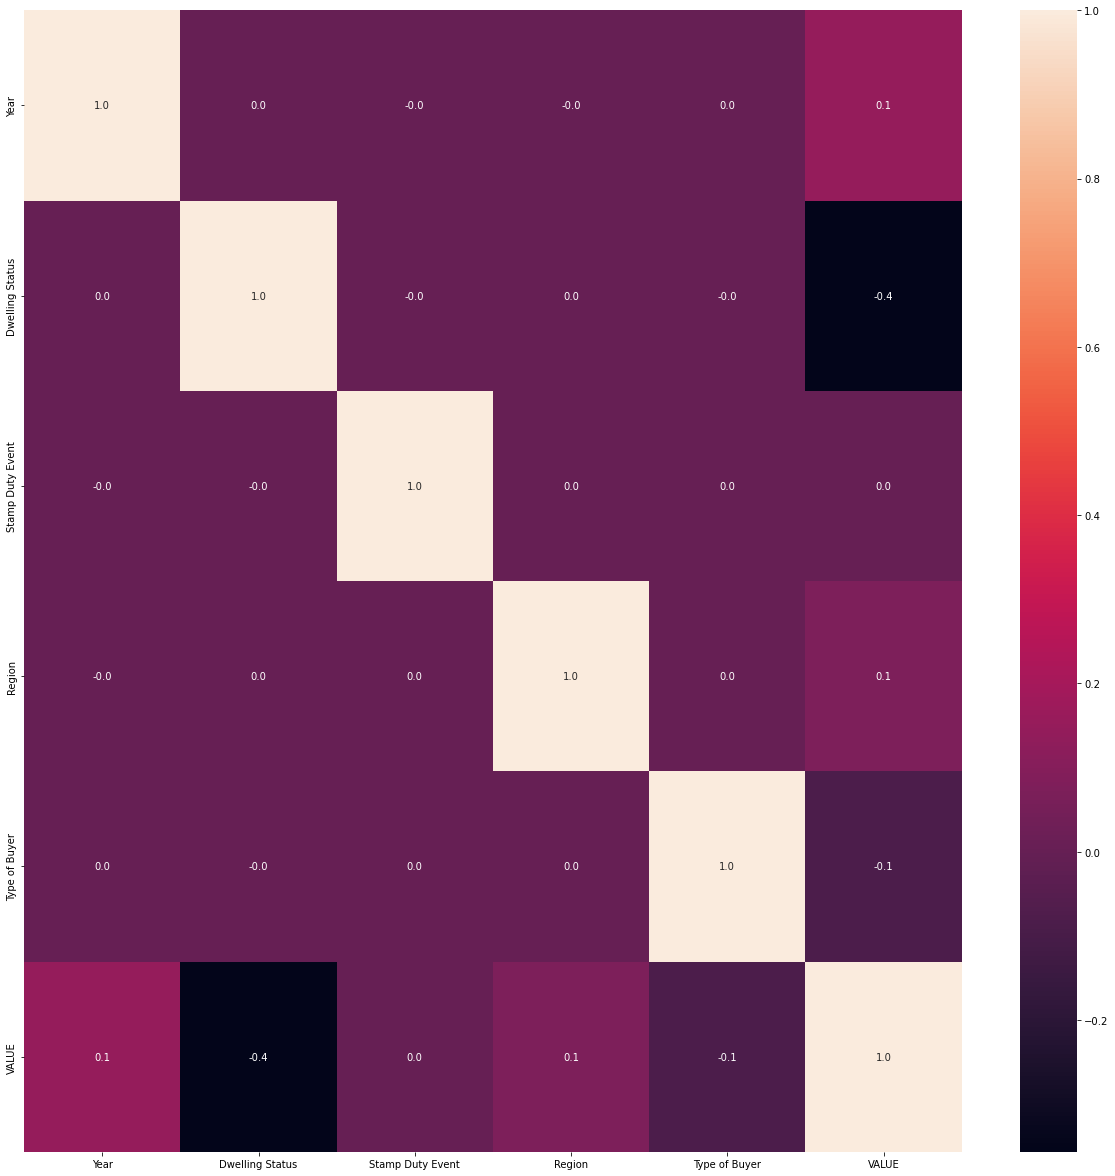

In [35]:
#You can also plot a heat map to understand how each feature correlates to the other (Do they go hand in hand or are they inversely propotional)

f= plt.subplots(figsize=(21,21))
sns.heatmap(df.corr(),annot=True,fmt='.1f',color='green')  #We can use a simple seaborn method to draw the heatmaps

<AxesSubplot:xlabel='Year', ylabel='VALUE'>

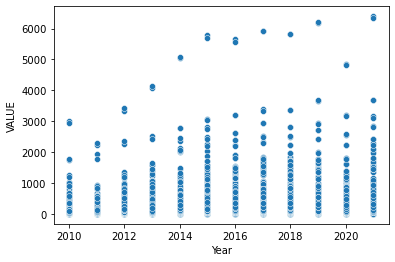

In [36]:
sns.scatterplot(x=df['Year'], y=df['VALUE'])

<AxesSubplot:xlabel='Dwelling Status', ylabel='VALUE'>

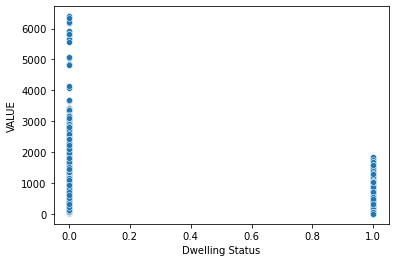

In [37]:
sns.scatterplot(x=df['Dwelling Status'], y=df['VALUE'])

<AxesSubplot:xlabel='Type of Buyer', ylabel='VALUE'>

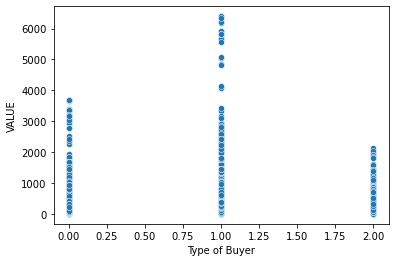

In [38]:
sns.scatterplot(x=df['Type of Buyer'], y=df['VALUE'])

Before the final part of the CA we knew that our dataset isn't the best. We have done more data manipulation. Cleaning, etc and the results are still below criticism. The only conclusion is that we have chosen a pretty nice dataset where variables have no crrelation at all. No matter what was done the results clearly said that there is noting in our dataset that we can use. 

# Machine Learning part

In [39]:
# split the data into featutes and target variable seperately
X = df.iloc[:, [0]].values # features set
y = df.iloc[:, -1].values # set of study variable

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
df=df.dropna().reset_index(drop=True)

In [42]:
!pip install python-math
import math
x = float("nan")
print(f"It's math.isnan : {math.isnan(x)}")

It's math.isnan : True


In [43]:
y = y.reshape(-1,1)

In [44]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Establish a model
model = SVR(C=1, cache_size=200, epsilon=1, kernel='rbf')

In [46]:
# Train the model
model.fit(X_train, y_train)

SVR(C=1, epsilon=1)

In [47]:
# Score the model - test
model.score(X_test, y_test)

-0.0832516524777227

In [48]:
# Score the model - train
model.score(X_train, y_train)

-0.08388567945823722

KNN - simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [49]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [50]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
clf.predict(X_test)

array([28, 76, 26, ..., 11, 51, 30], dtype=int64)

In [52]:
print('Accuracy on training set: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy on training set: 0.009
Accuracy on test set: 0.007


Decision tree - can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions.

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 0.021
Accuracy on test set: 0.010


SVC - supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification.

In [55]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(svc.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(svc.score(X_test, y_test)))

Accuracy on training set: 0.017
Accuracy on test set: 0.015


As expected, the results from our Machine Leanring models shows that the corelation between variables in our dataset is nearly 0. Hopefully in the future the datasets will be more useful than the one used in this final CA for Strategic Thinking.